In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pyclesperanto as cle
from pyclesperanto.__experimental__ import sato as cle_sato
from pyclesperanto.__experimental__ import hessian_gaussian_eigenvalues
from pyclesperanto.__experimental__ import gaussian_derivative

from scipy.ndimage import gaussian_filter

from skimage.filters import sato
from skimage.feature.corner import hessian_matrix, hessian_matrix_eigvals
from skimage import data

cle.select_device(1,"gpu")

(OpenCL) NVIDIA GeForce RTX 4090 (OpenCL 3.0 CUDA)
	Vendor:                      NVIDIA Corporation
	Driver Version:              535.247.01
	Device Type:                 GPU
	Compute Units:               128
	Global Memory Size:          24217 MB
	Local Memory Size:           0 MB
	Maximum Buffer Size:         6054 MB
	Max Clock Frequency:         2625 MHz
	Image Support:               Yes

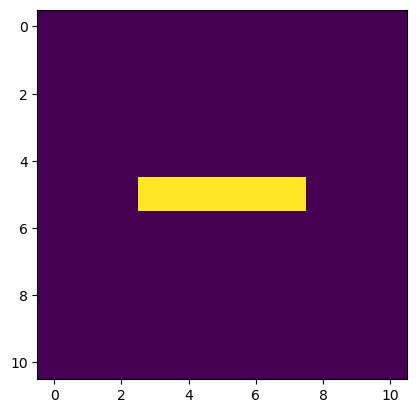

In [2]:
sigma = 3
arr = np.zeros((11,11)).astype(np.float32)
arr[5,3:8]= 1
plt.imshow(arr)

### skimage

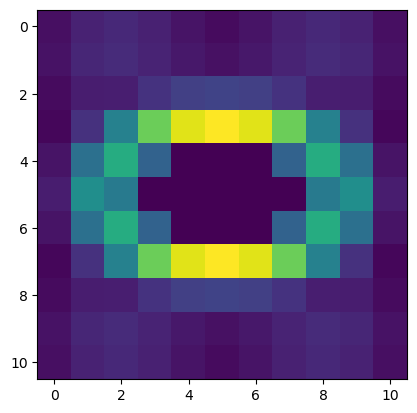

In [3]:
sk = sato(arr, sigmas=(1,sigma,1))
plt.imshow(sk)

### pyclesperanto

Processing sigma: 1
Processing sigma: 2


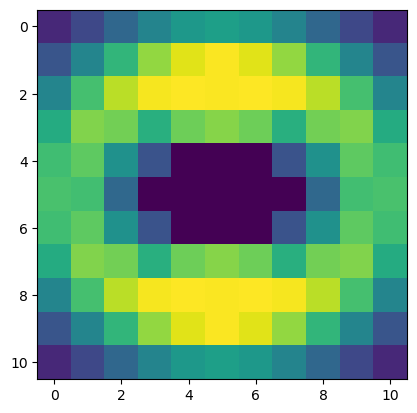

In [4]:
cl = cle_sato(arr, sigma_minimum=1, sigma_maximum=sigma, sigma_step=1).get()
plt.imshow(cl)

### Practical example

In [6]:
image = -(data.brick().astype(np.float32))
sigma = 5
sck_res = sato(image, sigmas=(1,sigma,1))
cle_res = cle_sato(image, sigma_minimum=1, sigma_maximum=sigma, sigma_step=1).get()

Processing sigma: 1
Processing sigma: 2
Processing sigma: 3
Processing sigma: 4


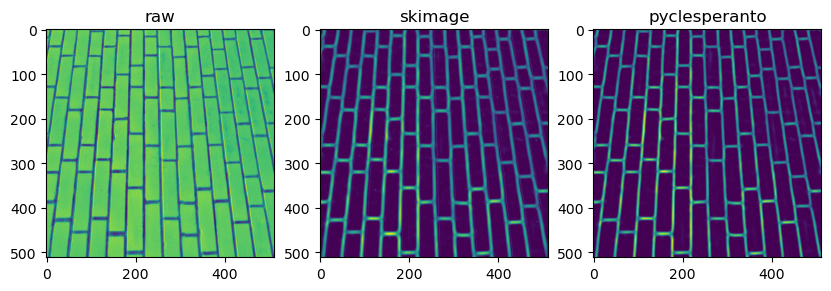

In [7]:
fig, axs = plt.subplots(1,3, figsize=(10,30))
axs[0].imshow(image)
axs[0].set_title("raw")
axs[1].imshow(sck_res, vmin=0, vmax=sck_res.max())
axs[1].set_title("skimage")
axs[2].imshow(cle_res, vmin=0, vmax=cle_res.max())
axs[2].set_title("pyclesperanto")
plt.show()

In [8]:
image = ((data.retina().sum(2)) / 3).astype(np.float32) # RGB so we take the average of the 3 channels

In [9]:
%time sck_res = sato(image, sigmas=(1,sigma,1))

CPU times: user 1.95 s, sys: 25.8 ms, total: 1.98 s
Wall time: 1.97 s


In [10]:
%time cle_res = cle_sato(image, sigma_minimum=1, sigma_maximum=sigma, sigma_step=1).get()

Processing sigma: 1
Processing sigma: 2
Processing sigma: 3
Processing sigma: 4
CPU times: user 18.4 ms, sys: 9.05 ms, total: 27.5 ms
Wall time: 40.3 ms


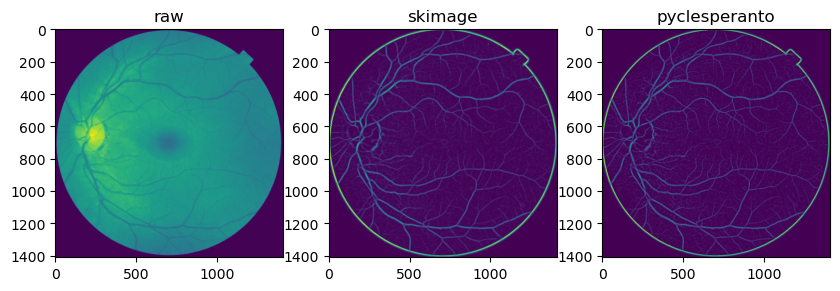

In [11]:
fig, axs = plt.subplots(1,3, figsize=(10,30))
axs[0].imshow(image)
axs[0].set_title("raw")
axs[1].imshow(sck_res, vmin=sck_res.min(), vmax=sck_res.max())
axs[1].set_title("skimage")
axs[2].imshow(cle_res, vmin=cle_res.min(), vmax=cle_res.max())
axs[2].set_title("pyclesperanto")
plt.show()